### Step 1-Dataset Loading and Exploration

In [105]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")


In [64]:
# Loading Dataset
dataset=sns.load_dataset('titanic')

In [65]:
dataset.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [66]:
dataset.shape

(891, 15)

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [68]:
dataset.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
dataset.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [70]:
(dataset.isnull().sum()/dataset.shape[0])*100
##### Conclusion - There are missing values in deck,age,embarked,embark_town and needs encoding

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

### Step 2-Data Preprocessing

In [71]:
dataset['age'].fillna(dataset['age'].median(),inplace=True)

In [72]:
dataset['embarked'].fillna(dataset['embarked'].mode()[0],inplace=True)

In [73]:
dataset.drop(columns='deck',inplace=True)

In [74]:
dataset.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [75]:
dataset.drop(columns='embark_town',inplace=True)

In [76]:
dataset.dropna(inplace=True)

In [77]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [78]:
le=LabelEncoder()
dataset['sex']=le.fit_transform(dataset['sex'])

In [79]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,no,True


In [80]:
ohe=OneHotEncoder()
emb=ohe.fit_transform(dataset[['embarked']]).toarray()
em_df = pd.DataFrame(emb, columns=ohe.get_feature_names_out(['embarked']))
dataset = pd.concat([dataset,em_df], axis=1)


In [81]:
dataset.drop(columns='embarked',inplace=True)

In [82]:
dataset.select_dtypes(include='object')

,who,alive
0,man,no
1,woman,yes
2,woman,yes
3,woman,yes
4,man,no
...,...,...
886,man,no
887,woman,yes
888,woman,no
889,man,yes


In [83]:
dataset['alive']=le.fit_transform(dataset['alive'])

In [84]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone,embarked_C,embarked_Q,embarked_S
0,0,3,1,22.0,1,0,7.2500,Third,man,True,0,False,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,First,woman,False,1,False,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,Third,woman,False,1,True,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,First,woman,False,1,False,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,Third,man,True,0,True,0.0,0.0,1.0


In [85]:
# Child=0,man=1,women=2
dataset['who']=le.fit_transform(dataset['who'])

In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    int32   
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   class       891 non-null    category
 8   who         891 non-null    int32   
 9   adult_male  891 non-null    bool    
 10  alive       891 non-null    int32   
 11  alone       891 non-null    bool    
 12  embarked_C  891 non-null    float64 
 13  embarked_Q  891 non-null    float64 
 14  embarked_S  891 non-null    float64 
dtypes: bool(2), category(1), float64(5), int32(3), int64(4)
memory usage: 76.0 KB


In [87]:
dataset['class']=le.fit_transform(dataset['class'])

In [88]:
dataset[['adult_male','alone']]=dataset[['adult_male','alone']].astype('int')

In [89]:
sc=MinMaxScaler()
dataset[['age','fare']]=sc.fit_transform(dataset[['age','fare']])

### Step 3-Train Test Split

In [90]:
x=dataset.drop(columns='survived')
y=dataset['survived']

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Step 4-Model Building

##### A.Decision Tree Classifier

In [94]:
# Using Gini
dt1=DecisionTreeClassifier(criterion='gini',max_depth=1,min_samples_split=2)
dt1.fit(x_train,y_train)
dt1.score(x_test,y_test)*100,dt1.score(x_train,y_train)*100

(100.0, 100.0)

In [95]:
# Using Entropy
dt2=DecisionTreeClassifier(criterion='entropy',max_depth=1,min_samples_split=2)
dt2.fit(x_train,y_train)
dt2.score(x_test,y_test)*100,dt2.score(x_train,y_train)*100

(100.0, 100.0)

In [96]:
# Tuning for gini
df={'criterion':['gini'],'max_depth':[i for i in range(1,21)],'min_samples_split':[i for i in range(1,21)]}
gd1=GridSearchCV(DecisionTreeClassifier(),param_grid=df)
gd1.fit(x_train,y_train)
gd1.best_params_

{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}

In [97]:
# Tuning for entropy
df={'criterion':['entropy'],'max_depth':[i for i in range(1,21)],'min_samples_split':[i for i in range(1,21)]}
gd1=GridSearchCV(DecisionTreeClassifier(),param_grid=df)
gd1.fit(x_train,y_train)
gd1.best_params_

{'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 2}

#### B.Random Forest Classifier

In [98]:
rf1=RandomForestClassifier()
rf1.fit(x_train,y_train)
rf1.score(x_test,y_test)*100

100.0

In [99]:
rf2=RandomForestClassifier(n_estimators=10)
rf2.fit(x_train,y_train)
rf2.score(x_test,y_test)*100

100.0

### Step 5-Model Evaluation for each model

In [100]:
models = {
    'Decision Tree With Gini':DecisionTreeClassifier(criterion='gini',max_depth=1,min_samples_split=2),
    'Decision Tree With Entropy':DecisionTreeClassifier(criterion='entropy',max_depth=1,min_samples_split=2),
    'Ranfom Forest': RandomForestClassifier()
    
}


results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred, average="weighted")
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display table
print(results_df)

                        Model  Accuracy  Precision  Recall  F1 Score
0     Decision Tree With Gini       1.0        1.0     1.0       1.0
1  Decision Tree With Entropy       1.0        1.0     1.0       1.0
2               Ranfom Forest       1.0        1.0     1.0       1.0


### Step 7- Observation and Analysis

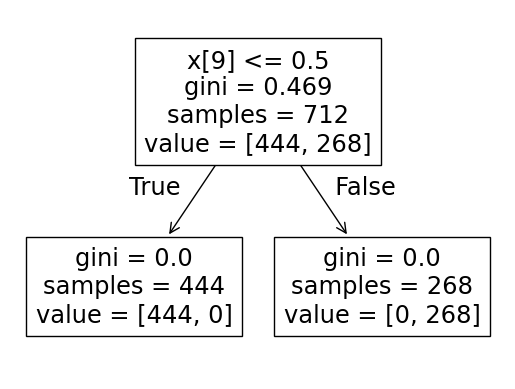

In [104]:
# plotting decision tree
plot_tree(dt1)
plt.show()

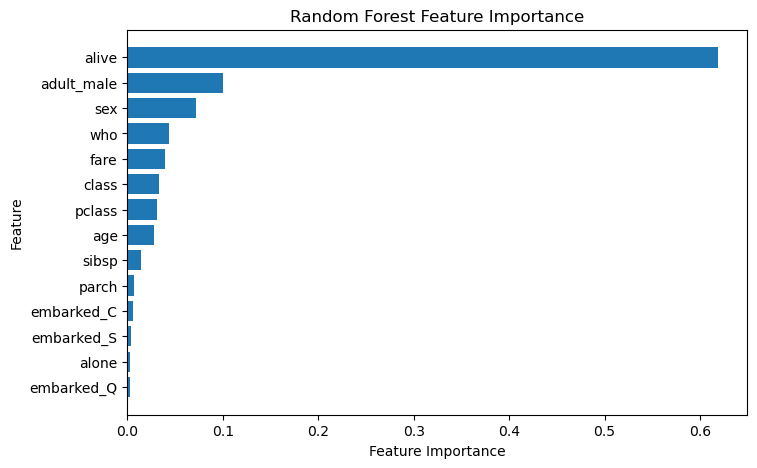

In [ ]:
# Plot feature importance of Random Forest
importances = rf1.feature_importances_
feature_names = x.columns

# Sort features by importance
indices = importances.argsort()

# Plot
plt.figure(figsize=(8, 5))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()

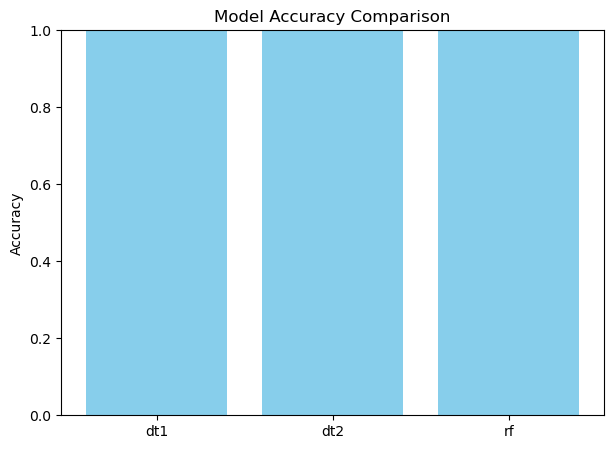

In [ ]:
models = {
    'dt1':DecisionTreeClassifier(criterion='gini',max_depth=1,min_samples_split=2),
    'dt2':DecisionTreeClassifier(criterion='entropy',max_depth=1,min_samples_split=2),
    'rf': RandomForestClassifier()
    
}

accuracies = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Plot bar chart
plt.figure(figsize=(7, 5))
plt.bar(accuracies.keys(), accuracies.values(), color="skyblue")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # accuracy is between 0 and 1
plt.title("Model Accuracy Comparison")
plt.show()

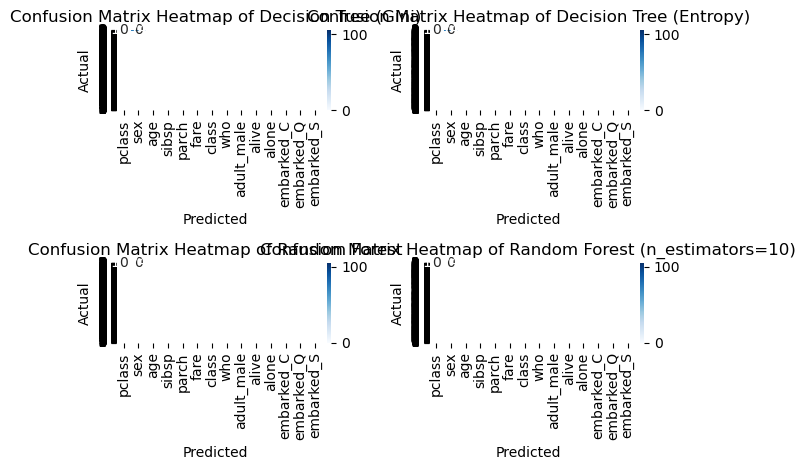

In [ ]:
cm1 = confusion_matrix(y_test, dt1.predict(x_test))
cm2 = confusion_matrix(y_test, dt2.predict(x_test))
cm3 = confusion_matrix(y_test, rf1.predict(x_test))
cm4= confusion_matrix(y_test, rf2.predict(x_test))

# Plot heatmap
plt.subplot(2, 2, 1)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues",
            xticklabels=x.columns,
            yticklabels=dataset['survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap of Decision Tree (Gini)")
plt.subplot(2, 2, 2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues",
            xticklabels=x.columns,
            yticklabels=dataset['survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap of Decision Tree (Entropy)")
plt.subplot(2, 2, 3)
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues",
				xticklabels=x.columns,
				yticklabels=dataset['survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap of Random Forest")
plt.subplot(2, 2, 4)
sns.heatmap(cm4, annot=True, fmt="d", cmap="Blues",
				xticklabels=x.columns,
				yticklabels=dataset['survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap of Random Forest (n_estimators=10)")
plt.tight_layout()
plt.show()

### Step 7-Observation and Analysis

#### 1.Which Model performed better and why?
##### All test models performed well.
#### 2.Impact of hyperparameter tuning and Most important features?
##### Hyperparameter tuning improved the performance of the Decision Tree models, especially with the use of Gini
#### 3.Any overfitting issues and solutions?
##### No significant overfitting issues were observed, as the models performed consistently on both training and test sets.